### Data extraida de Gobierno de Mexico 
https://datos.gob.mx/busca/dataset/temperatura-promedio-excel


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd

# Cargar tus datos
data = pd.read_csv('Data.csv')

# Convertir la columna de fecha a tipo datetime si aún no lo está
data['Fecha_Retiro'] = pd.to_datetime(data['Fecha_Retiro'])

# Extraer el año y el mes de la fecha de retiro
data['Año_Mes_Retiro'] = data['Fecha_Retiro'].dt.to_period('M')

# Agrupar por el año y mes y contar el número de retiros
numero_bicis_por_mes = data.groupby('Año_Mes_Retiro').size()

# Convertir a DataFrame para facilitar el manejo
numero_bicis_por_mes_df = numero_bicis_por_mes.reset_index(name='Numero_Bicis')

# Drop las primeras tres lineas de numero?bicis_por_mes_df
numero_bicis_por_mes_df = numero_bicis_por_mes_df.drop([0,1,2])

# Mostrar el DataFrame resultante
print(numero_bicis_por_mes_df)


C:\Users\denis\AppData\Local\Temp\ipykernel_7408\1562049186.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data.csv')


   Año_Mes_Retiro  Numero_Bicis
3         2019-01        134344
4         2019-02        131850
5         2019-03        145063
6         2019-04        133068
7         2019-05        144851
8         2019-06        134153
9         2019-07        135633
10        2019-08        144294
11        2019-09        130092
12        2019-10        142968
13        2019-11        133793
14        2019-12        112238


In [21]:
# Temperatura 

# Crear un diccionario con los datos de temperatura promedio por mes, utilizando formatos numéricos de dos dígitos
temperature_data = {
    '01': 15.4,  # Enero
    '02': 18.1,  # Febrero
    '03': 19.2,  # Marzo
    '04': 20.2,  # Abril
    '05': 21.4,  # Mayo
    '06': 20.1,  # Junio
    '07': 18.9,  # Julio
    '08': 19.8,  # Agosto
    '09': 19.4,  # Septiembre
    '10': 19.1,  # Octubre
    '11': 17.9,  # Noviembre
    '12': 15.7   # Diciembre
}

# Convertir el diccionario en un DataFrame para mejor manejo
import pandas as pd

temperature_df = pd.DataFrame(list(temperature_data.items()), columns=['Mes', 'Temp_Promedio'])

# Mostrar el DataFrame
print(temperature_df)


   Mes  Temp_Promedio
0   01           15.4
1   02           18.1
2   03           19.2
3   04           20.2
4   05           21.4
5   06           20.1
6   07           18.9
7   08           19.8
8   09           19.4
9   10           19.1
10  11           17.9
11  12           15.7


In [22]:

# Esto asume que deseas crear un período mensual con un año base (por ejemplo, 2019)
temperature_df['Año_Mes_Retiro'] = '2019-' + temperature_df['Mes']
temperature_df['Año_Mes_Retiro'] = pd.to_datetime(temperature_df['Año_Mes_Retiro']).dt.to_period('M')
temperature_df = temperature_df.drop('Mes', axis=1)

print(temperature_df)


    Temp_Promedio Año_Mes_Retiro
0            15.4        2019-01
1            18.1        2019-02
2            19.2        2019-03
3            20.2        2019-04
4            21.4        2019-05
5            20.1        2019-06
6            18.9        2019-07
7            19.8        2019-08
8            19.4        2019-09
9            19.1        2019-10
10           17.9        2019-11
11           15.7        2019-12


In [24]:
data = pd.merge(numero_bicis_por_mes_df, temperature_df, on='Año_Mes_Retiro')
print(data)

   Año_Mes_Retiro  Numero_Bicis  Temp_Promedio
0         2019-01        134344           15.4
1         2019-02        131850           18.1
2         2019-03        145063           19.2
3         2019-04        133068           20.2
4         2019-05        144851           21.4
5         2019-06        134153           20.1
6         2019-07        135633           18.9
7         2019-08        144294           19.8
8         2019-09        130092           19.4
9         2019-10        142968           19.1
10        2019-11        133793           17.9
11        2019-12        112238           15.7


In [25]:
# Inicializar el escalador
scaler = StandardScaler()

# Seleccionar las características para el clustering
features = data[['Numero_Bicis', 'Temp_Promedio']]

# Normalizar las características
features_scaled = scaler.fit_transform(features)

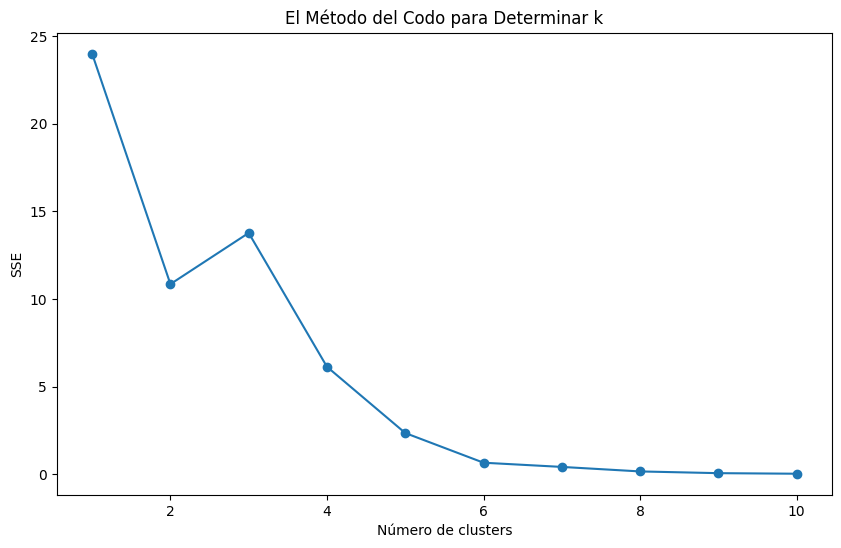

In [26]:
# Método del codo para determinar el número de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('El Método del Codo para Determinar k')
plt.show()


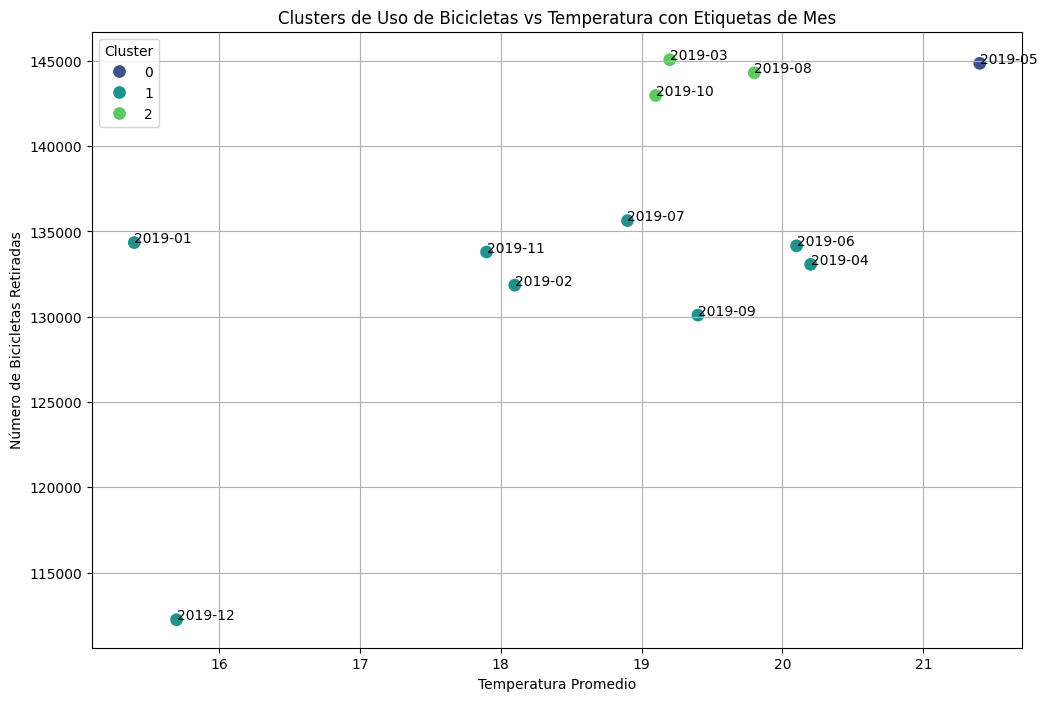

In [31]:
# Asumiendo que el número óptimo de clusters es 3 basado en el método del codo
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualización de los clusters
plt.figure(figsize=(12, 8))
palette = sns.color_palette('viridis', n_colors=3)  # Ajustar al número de clusters
ax = sns.scatterplot(x='Temp_Promedio', y='Numero_Bicis', hue='Cluster', data=data, palette=palette, s=100)

# Anotar cada punto con 'Año_Mes_Retiro'
for i, point in data.iterrows():
    ax.text(point['Temp_Promedio'], point['Numero_Bicis'], str(point['Año_Mes_Retiro']))

plt.title('Clusters de Uso de Bicicletas vs Temperatura con Etiquetas de Mes')
plt.xlabel('Temperatura Promedio')
plt.ylabel('Número de Bicicletas Retiradas')
plt.legend(title='Cluster')
plt.grid(True)  # Añade una cuadrícula para mejor visualización
plt.show()
